## Cálculo da FTN

### Importando Bibliotecas

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Carregando Bases de Dados

In [3]:
df = pd.read_csv("C:/Users/Cristiano/OneDrive - Belago Technologies/Documentos/projeto_fnt/data/dataframe_concat.csv")
df2 = pd.read_csv("C:/Users/Cristiano/OneDrive - Belago Technologies/Documentos/projeto_fnt/data/BASES_COMPLETAS.csv")

In [4]:
df.head(5)

,regiao,operacao,original,temperaturatermometro,amplitude,status,dataref,year,month,day,error_category,year_month
0,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
1,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
2,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
3,NORTE,araraquara,thermo_ID_21106,26.0,6.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
4,NORTE,araraquara,thermo_ID_21106,24.0,4.0,Normal,2020-02-05,2020,2,5,Normal,2020-02


In [5]:
df2.head(2)

,COD_TERM,DESCRICAO TERM,DATA LEITURA,TEMP MÍN,TEMP MÁX,TEMP MÉDIA,DELTA,ERRO MÍN.,ERRO MÁX,ERRO DELTA,VERIFIC.,ANO
0,ZAR,ARARAQUARA,2007-01-24,21.0,22.0,21.5,1.0,NaN,NaN,erro,ERRO,2007
1,ZAR,ARARAQUARA,2007-01-25,20.0,38.0,29.0,18.0,NaN,NaN,NaN,OK,2007


In [6]:
# Certifique-se de que as colunas de data estão no formato datetime
df['dataref'] = pd.to_datetime(df['dataref'])
df2['DATA LEITURA'] = pd.to_datetime(df2['DATA LEITURA'])

In [7]:
df_merged = pd.merge(df, df2, left_on='dataref', right_on='DATA LEITURA', how='left')

In [8]:
# Remover uma das colunas de data (exemplo: 'DATA LEITURA')
df_merged = df_merged.drop(columns=['DATA LEITURA'])


In [9]:
# Renomear as colunas, por exemplo:
df_merged.rename(columns={
    'TEMP MÍN': 'temp_min',
    'TEMP MÁX': 'temp_max',
    'TEMP MÉDIA': 'temp_media',
    'DELTA': 'delta',
    'ERRO MÍN.': 'erro_min',
    'ERRO MÁX': 'erro_max',
    'ERRO DELTA': 'erro_delta',
    'VERIFIC.': 'verific',
    'ANO': 'ano'
}, inplace=True)


In [10]:
# Ajustar o código para remover apenas as colunas que existem no DataFrame
columns_to_drop = ['DESCRICAO TERM', 'temp_min', 'temp_media', 'erro_min', 'ERRO MÁX', 'erro_delta', 'verific', 'ano']

# Verificar quais colunas realmente existem no DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df_merged.columns]

# Remover as colunas existentes
df_merged.drop(columns=existing_columns_to_drop, inplace=True)

# Exibir o DataFrame após a remoção das colunas
df_merged

,regiao,operacao,original,temperaturatermometro,amplitude,status,dataref,year,month,day,error_category,year_month,COD_TERM,temp_max,delta,ERRO MÁX
0,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02,ZAR,48.0,28.0,NaN
1,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02,ZEM,36.0,17.0,NaN
2,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02,ZYU,36.0,17.0,NaN
3,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02,ZMK,46.0,27.0,NaN
4,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02,ZRO,44.0,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525285,NORTE,araraquara,thermo_id_20001336,111.5,1.1,ErroTO,2024-12-27,2024,12,27,ErroTO,2024-12,NaN,NaN,NaN,NaN
1525286,NORTE,araraquara,thermo_id_20001336,111.5,1.1,ErroTO,2024-12-27,2024,12,27,ErroTO,2024-12,NaN,NaN,NaN,NaN
1525287,NORTE,araraquara,thermo_id_20001336,111.5,1.1,ErroTO,2024-12-27,2024,12,27,ErroTO,2024-12,NaN,NaN,NaN,NaN
1525288,NORTE,araraquara,thermo_id_20001336,111.5,1.3,ErroTO,2024-12-27,2024,12,27,ErroTO,2024-12,NaN,NaN,NaN,NaN


In [11]:
df_merged.isnull().sum()

regiao                         0
operacao                       0
original                       0
temperaturatermometro          0
amplitude                      0
status                         0
dataref                        0
year                           0
month                          0
day                            0
error_category                 0
year_month                     0
COD_TERM                  144800
temp_max                  144800
delta                     144800
ERRO MÁX                 1522104
dtype: int64

In [12]:
df_normal = df[df['error_category'] == 'Normal']

In [13]:
df_normal.isnull().sum()

regiao                   0
operacao                 0
original                 0
temperaturatermometro    0
amplitude                0
status                   0
dataref                  0
year                     0
month                    0
day                      0
error_category           0
year_month               0
dtype: int64

In [14]:
df_normal.drop(columns=['year_month', 'error_category'], inplace=True)

C:\Users\Cristiano\AppData\Local\Temp\ipykernel_55024\1029184985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal.drop(columns=['year_month', 'error_category'], inplace=True)


In [15]:
df_normal.head(5)

,regiao,operacao,original,temperaturatermometro,amplitude,status,dataref,year,month,day
0,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5
1,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5
2,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5
3,NORTE,araraquara,thermo_ID_21106,26.0,6.0,Normal,2020-02-05,2020,2,5
4,NORTE,araraquara,thermo_ID_21106,24.0,4.0,Normal,2020-02-05,2020,2,5


## 1. Agregar por dia (mínimo e máximo)

In [16]:
# Primeiro, vamos garantir que a coluna 'dataref' está em formato datetime
df['dataref'] = pd.to_datetime(df['dataref'])

# Agora, vamos agrupar por dia e calcular o mínimo e máximo das temperaturas
df_daily = df.groupby('dataref').agg(
    temp_min=('temperaturatermometro', 'min'),
    temp_max=('temperaturatermometro', 'max')
).reset_index()

# Visualizando as primeiras linhas
df_daily.head()

,dataref,temp_min,temp_max
0,2020-02-05,21.0,28.0
1,2020-02-06,20.0,37.0
2,2020-02-07,18.0,39.0
3,2020-02-08,18.0,45.0
4,2020-02-09,20.0,37.0


## 2. Usar apenas as medidas sem erro

In [17]:
# Filtrando apenas as linhas com status "Normal"
df_normal = df[df['error_category'] == 'Normal']

# Agora, agregamos por dia novamente com os dados filtrados
df_normal_daily = df_normal.groupby('dataref').agg(
    temp_min=('temperaturatermometro', 'min'),
    temp_max=('temperaturatermometro', 'max')
).reset_index()

# Visualizando as primeiras linhas
df_normal_daily.head()

,dataref,temp_min,temp_max
0,2020-02-05,21.0,28.0
1,2020-02-06,20.0,37.0
2,2020-02-07,18.0,39.0
3,2020-02-08,18.0,45.0
4,2020-02-09,20.0,37.0


## 3. Complementar com o histórico dos termômetros

In [18]:
df_combined = df_normal
df_combined

,regiao,operacao,original,temperaturatermometro,amplitude,status,dataref,year,month,day,error_category,year_month
0,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
1,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
2,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
3,NORTE,araraquara,thermo_ID_21106,26.0,6.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
4,NORTE,araraquara,thermo_ID_21106,24.0,4.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
...,...,...,...,...,...,...,...,...,...,...,...,...
236616,NORTE,araraquara,thermo_id_20001336,60.7,61.7,Normal,2024-12-21,2024,12,21,Normal,2024-12
236617,NORTE,araraquara,thermo_id_20001336,56.1,57.1,Normal,2024-12-21,2024,12,21,Normal,2024-12
236634,NORTE,araraquara,thermo_id_20001336,62.4,38.5,Normal,2024-12-22,2024,12,22,Normal,2024-12
237775,NORTE,araraquara,thermo_id_20001336,58.7,34.5,Normal,2024-12-27,2024,12,27,Normal,2024-12


## 3a. Cálculo do Centro de Gravidade

In [19]:
# Supondo que o dataframe seja chamado df_combined
df_combined['dataref'] = pd.to_datetime(df_combined['dataref']) 

# Filtrar apenas as linhas com status "Normal"
df_normal = df_combined[df_combined['error_category'] == 'Normal']

# Agrupar por dia e calcular o mínimo e máximo das temperaturas
df_daily = df_normal.groupby('dataref').agg(
    temp_min=('temperaturatermometro', 'min'),
    temp_max=('temperaturatermometro', 'max')
).reset_index()

df_daily['delta'] = df_daily['temp_max'] - df_daily ['temp_min']
df_daily= df_daily[(df_daily.delta >= 10)&(df_daily.delta <= 40)].reset_index(drop = True)

# Definir os blocos de 2 graus para as temperaturas máximas
temp_bins = np.arange(df_daily['temp_min'].min(), df_daily['temp_max'].max() + 2, 2)

# Classificar os dados de temperatura máxima em bins de 2 graus
df_daily['temp_bin'] = pd.cut(df_daily['temp_max'], bins=temp_bins)

df_daily['temp_bin_min'] = pd.cut(df_daily['temp_min'], bins=temp_bins)


# Obter os valores médios de cada bin para usá-los nos cálculos
df_daily['temp_bin_center'] = df_daily['temp_bin'].apply(lambda x: (x.left + x.right) / 2)

df_daily['temp_bin_center_min'] = df_daily['temp_bin_min'].apply(lambda x: (x.left + x.right) / 2)



C:\Users\Cristiano\AppData\Local\Temp\ipykernel_55024\2540260283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['dataref'] = pd.to_datetime(df_combined['dataref'])


In [20]:
df_daily

,dataref,temp_min,temp_max,delta,temp_bin,temp_bin_min,temp_bin_center,temp_bin_center_min
0,2020-02-06,20.0,37.0,17.0,"(36.0, 38.0]","(18.0, 20.0]",37.0,19.0
1,2020-02-07,18.0,39.0,21.0,"(38.0, 40.0]","(16.0, 18.0]",39.0,17.0
2,2020-02-08,18.0,45.0,27.0,"(44.0, 46.0]","(16.0, 18.0]",45.0,17.0
3,2020-02-09,20.0,37.0,17.0,"(36.0, 38.0]","(18.0, 20.0]",37.0,19.0
4,2020-02-11,17.0,28.0,11.0,"(26.0, 28.0]","(16.0, 18.0]",27.0,17.0
...,...,...,...,...,...,...,...,...
1576,2024-12-12,15.5,48.1,32.6,"(48.0, 50.0]","(14.0, 16.0]",49.0,15.0
1577,2024-12-13,16.7,53.0,36.3,"(52.0, 54.0]","(16.0, 18.0]",53.0,17.0
1578,2024-12-15,17.8,40.8,23.0,"(40.0, 42.0]","(16.0, 18.0]",41.0,17.0
1579,2024-12-16,19.7,42.6,22.9,"(42.0, 44.0]","(18.0, 20.0]",43.0,19.0


In [21]:
# Contar a quantidade de dias em cada bin
df_bin_count = df_daily.groupby('temp_bin_center').size().reset_index(name='count')

# Verificar se não há valores ausentes
df_bin_count = df_bin_count.dropna(subset=['temp_bin_center', 'count'])

# Contar a quantidade de dias em cada bin
df_bin_count_min = df_daily.groupby('temp_bin_center_min').size().reset_index(name='count')

# Verificar se não há valores ausentes
df_bin_count_min = df_bin_count_min.dropna(subset=['temp_bin_center_min', 'count'])



C:\Users\Cristiano\AppData\Local\Temp\ipykernel_55024\2444266028.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bin_count = df_daily.groupby('temp_bin_center').size().reset_index(name='count')
C:\Users\Cristiano\AppData\Local\Temp\ipykernel_55024\2444266028.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bin_count_min = df_daily.groupby('temp_bin_center_min').size().reset_index(name='count')


In [22]:
## Juntar os bins calculados para temp max e min

df_bin_count_final = pd.merge(df_bin_count, df_bin_count_min, left_on = 'temp_bin_center', right_on = 'temp_bin_center_min', how = 'outer', suffixes=('_max', '_min'))
df_bin_count_final = df_bin_count_final.drop(columns = ['temp_bin_center_min'])
df_bin_count_final['count_final'] = df_bin_count_final.count_max + df_bin_count_final.count_min
df_bin_count_final

,temp_bin_center,count_max,count_min,count_final
0,1.0,0,8,8
1,3.0,0,8,8
2,5.0,0,14,14
3,7.0,0,34,34
4,9.0,0,65,65
5,11.0,0,154,154
6,13.0,1,181,182
7,15.0,0,266,266
8,17.0,0,305,305
9,19.0,3,397,400


In [23]:
# Garantir que as colunas estejam no tipo numérico correto
df_bin_count_final['X'] = pd.to_numeric(df_bin_count_final['temp_bin_center'], errors='coerce')
df_bin_count_final['Area'] = pd.to_numeric(2 * df_bin_count_final['count_final'], errors='coerce')

# Verificar se os valores de 'X' e 'Area' 
print(df_bin_count_final[['temp_bin_center', 'X', 'Area']])

# Calcular as variáveis MX e MY
df_bin_count_final['MX'] = df_bin_count_final['Area'] * df_bin_count_final['X']

# MY: A média ponderada da quantidade de dias no bin
df_bin_count_final['MY'] = df_bin_count_final['Area'] * df_bin_count_final['X']  

# Calcular CG X e CG Y
CG_X = df_bin_count_final['MX'].sum() / df_bin_count_final['Area'].sum()
CG_Y = df_bin_count_final['MY'].sum() / df_bin_count_final['Area'].sum()

# Definir a faixa de temperatura neutra
CG_center = CG_X + 5
CG_range = (CG_X, CG_X + 10)

# Exibir os resultados
print(f"CG_X: {CG_X}, CG_Y: {CG_Y}, Centro da FTN: {CG_center}, Faixa da FTN: {CG_range}")

   temp_bin_center     X  Area
0              1.0   1.0    16
1              3.0   3.0    16
2              5.0   5.0    28
3              7.0   7.0    68
4              9.0   9.0   130
5             11.0  11.0   308
6             13.0  13.0   364
7             15.0  15.0   532
8             17.0  17.0   610
9             19.0  19.0   800
10            21.0  21.0   244
11            23.0  23.0    46
12            25.0  25.0    26
13            27.0  27.0    34
14            29.0  29.0    44
15            31.0  31.0    54
16            33.0  33.0   124
17            35.0  35.0   198
18            37.0  37.0   230
19            39.0  39.0   342
20            41.0  41.0   408
21            43.0  43.0   360
22            45.0  45.0   346
23            47.0  47.0   372
24            49.0  49.0   272
25            51.0  51.0   184
26            53.0  53.0    72
27            55.0  55.0    60
28            57.0  57.0    24
29            59.0  59.0     4
30            61.0  61.0     2
31      

In [24]:
CG_center

np.float64(34.118987341772154)

## 3b. Cálculo da FTN com Mínimo e Máximo

In [25]:
# Agrupar por dia e calcular o mínimo e máximo das temperaturas
df_daily = df_combined.groupby('dataref').agg(
    temp_min=('temperaturatermometro', 'min'),
    temp_max=('temperaturatermometro', 'max')
).reset_index()
df_daily['delta'] = df_daily['temp_max'] - df_daily ['temp_min']
df_daily= df_daily[(df_daily.delta >= 10)&(df_daily.delta <= 40)].reset_index(drop = True)
# Calcular o mínimo e máximo histórico
min_historico = df_daily['temp_min'].min()
max_historico = df_daily['temp_max'].max()

# Cálculo do início, centro e fim da FTN
inicio_ftn = (min_historico + max_historico) / 2
centro_ftn = inicio_ftn + 5
fim_ftn = inicio_ftn + 10

print(min_historico, max_historico, inicio_ftn, centro_ftn, fim_ftn)

0.0 63.2 31.6 36.6 41.6


## 3c. Cálculo da FTN com 4 Sigma

In [26]:
# Agrupar por dia e calcular o mínimo e máximo das temperaturas
df_daily = df_combined.groupby('dataref').agg(
    temp_min=('temperaturatermometro', 'min'),
    temp_max=('temperaturatermometro', 'max')
).reset_index()
df_daily['delta'] = df_daily['temp_max'] - df_daily ['temp_min']
df_daily= df_daily[(df_daily.delta >= 10)&(df_daily.delta <= 40)].reset_index(drop = True)
# Calcular o desvio padrão para as mínimas e máximas
std_min = df_daily['temp_min'].std()
std_max = df_daily['temp_max'].std()

# Calcular o número de medidas a serem removidas
n_min = int(0.0062 * len(df_daily['temp_min']))
n_max = int(0.0062 * len(df_daily['temp_max']))

# Ordenar e remover as medidas mais extremas
df_daily_sorted_min = df_daily.sort_values('temp_min')
df_daily_sorted_max = df_daily.sort_values('temp_max')

df_daily_trimmed = df_daily_sorted_min.iloc[n_min:-n_min]
df_daily_trimmed = df_daily_trimmed.iloc[n_max:-n_max]

# Recalcular o mínimo e máximo após a remoção
min_historico_trimmed = df_daily_trimmed['temp_min'].min()
max_historico_trimmed = df_daily_trimmed['temp_max'].max()

# Recalcular a FTN
inicio_FTN_trimmed = (min_historico_trimmed + max_historico_trimmed) / 2
centro_FTN_trimmed = inicio_FTN_trimmed + 5
fim_FTN_trimmed = inicio_FTN_trimmed + 10

inicio_FTN_trimmed, centro_FTN_trimmed, fim_FTN_trimmed

(np.float64(32.35), np.float64(37.35), np.float64(42.35))

## Gráfico Temperaturas Mínimas e Máximas com FTN

In [35]:
df_daily = df_combined.groupby('dataref').agg(
    temp_min=('temperaturatermometro', 'min'),
    temp_max=('temperaturatermometro', 'max')
).reset_index()

min_historico = df_daily['temp_min'].min()
max_historico = df_daily['temp_max'].max()

inicio_FTN = (min_historico + max_historico) / 2
centro_FTN = inicio_FTN + 5
fim_FTN = inicio_FTN + 10

fig = go.Figure()

# Adicionar as linhas de temperatura máxima e mínima
fig.add_trace(go.Scatter(x=df_daily['dataref'], y=df_daily['temp_max'], name='Temperatura Máxima',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=df_daily['dataref'], y=df_daily['temp_min'], name='Temperatura Mínima',
                         line=dict(color='royalblue', width=4)))

# Adicionar as linhas de FTN
fig.add_trace(go.Scatter(x=df_daily['dataref'], y=[inicio_FTN]*len(df_daily), name='Início FTN',
                         line=dict(color='green', width=2, dash='dash')))
fig.add_trace(go.Scatter(x=df_daily['dataref'], y=[centro_FTN]*len(df_daily), name='Centro FTN',
                         line=dict(color='orange', width=2, dash='dash')))
fig.add_trace(go.Scatter(x=df_daily['dataref'], y=[fim_FTN]*len(df_daily), name='Fim FTN',
                         line=dict(color='purple', width=2, dash='dash')))

fig.update_layout(
    title='Temperaturas Mínimas e Máximas com FTN',
    xaxis=dict(title='Data'),
    yaxis=dict(title='Temperatura (°C)'),
    showlegend=True
)

fig.show()

# Retornar os valores de FTN
inicio_FTN, centro_FTN, fim_FTN

(np.float64(31.6), np.float64(36.6), np.float64(41.6))

: 

In [27]:
centro_FTN_trimmed

np.float64(37.35)

In [28]:
df_zar = df_combined[df_combined['operacao'] == 'araraquara']

# Salvar em um arquivo CSV
#df_zar.to_csv('zar_temperaturas.csv', index=False)

## Gráfico Análise das Temperaturas ao Longo do Tempo

C:\Users\Cristiano\AppData\Local\Temp\ipykernel_55024\3950874570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['dataref'] = pd.to_datetime(df_combined['dataref'])  # Converter a coluna 'dataref' para datetime


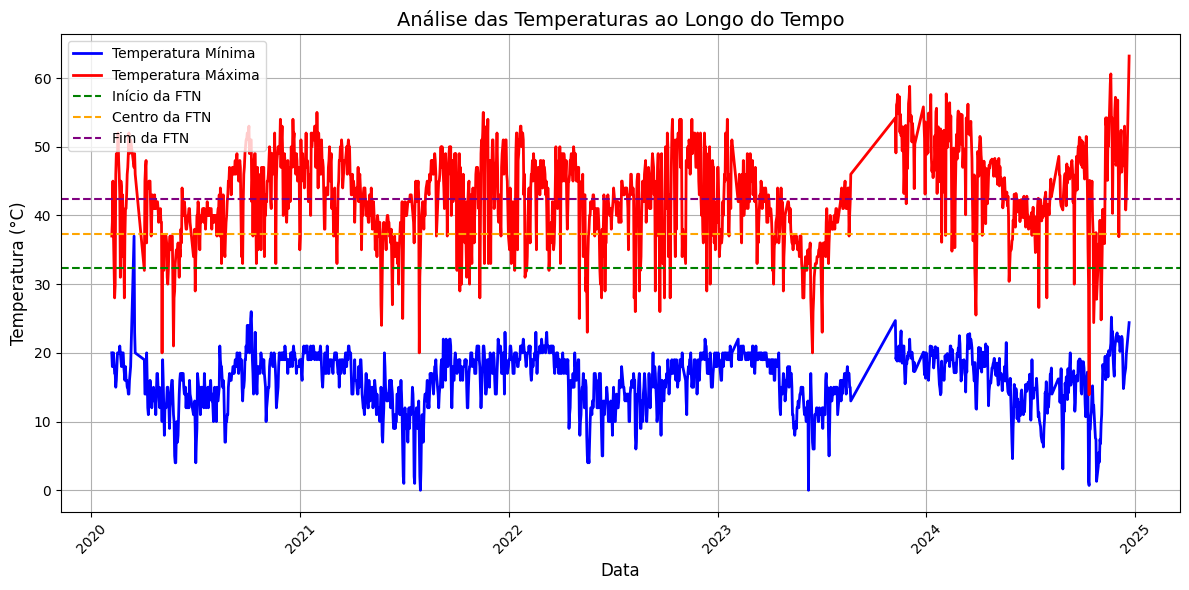

In [29]:
df_combined['dataref'] = pd.to_datetime(df_combined['dataref'])  # Converter a coluna 'dataref' para datetime

# Plotando as temperaturas mínimas e máximas ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df_daily['dataref'], df_daily['temp_min'], label='Temperatura Mínima', color='blue', linestyle='-', linewidth=2)
plt.plot(df_daily['dataref'], df_daily['temp_max'], label='Temperatura Máxima', color='red', linestyle='-', linewidth=2)

# Adicionando a faixa de Temperatura Neutra (FTN)
plt.axhline(y=inicio_FTN_trimmed, color='green', linestyle='--', label='Início da FTN')
plt.axhline(y=centro_FTN_trimmed, color='orange', linestyle='--', label='Centro da FTN')
plt.axhline(y=fim_FTN_trimmed, color='purple', linestyle='--', label='Fim da FTN')

plt.title('Análise das Temperaturas ao Longo do Tempo', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)

plt.legend()

plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

## Gráfico Distribuição das Temperaturas e Faixa de Temperatura Neutra

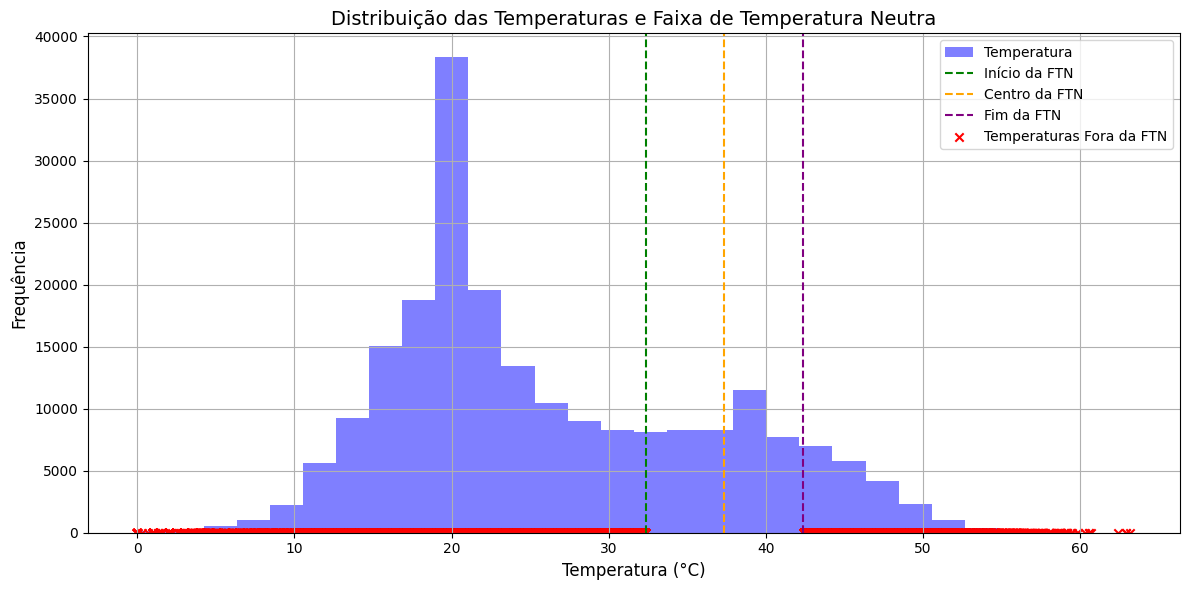

In [30]:
# Definindo os valores para a faixa de Temperatura Neutra (FTN)

plt.figure(figsize=(12, 6))

plt.hist(df_combined['temperaturatermometro'], bins=30, alpha=0.5, label='Temperatura', color='blue')

# Adicionando a faixa de Temperatura Neutra (FTN)
plt.axvline(x=inicio_FTN_trimmed, color='green', linestyle='--', label='Início da FTN')
plt.axvline(x=centro_FTN_trimmed, color='orange', linestyle='--', label='Centro da FTN')
plt.axvline(x=fim_FTN_trimmed, color='purple', linestyle='--', label='Fim da FTN')

# Exibindo as temperaturas fora da FTN (fora da faixa de 5 a 10 graus em torno do centro)
out_of_ftn = df_combined[(df_combined['temperaturatermometro'] < inicio_FTN_trimmed) |
                         (df_combined['temperaturatermometro'] > fim_FTN_trimmed)]

plt.scatter(out_of_ftn['temperaturatermometro'], np.zeros_like(out_of_ftn['temperaturatermometro']), 
            color='red', marker='x', label='Temperaturas Fora da FTN')

plt.title('Distribuição das Temperaturas e Faixa de Temperatura Neutra', fontsize=14)
plt.xlabel('Temperatura (°C)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.legend()

plt.grid(True)

plt.tight_layout()
plt.show()

## Gráfico Distribuição das Temperaturas e Centro de Gravidade (CG) com Faixa de Temperatura Neutra

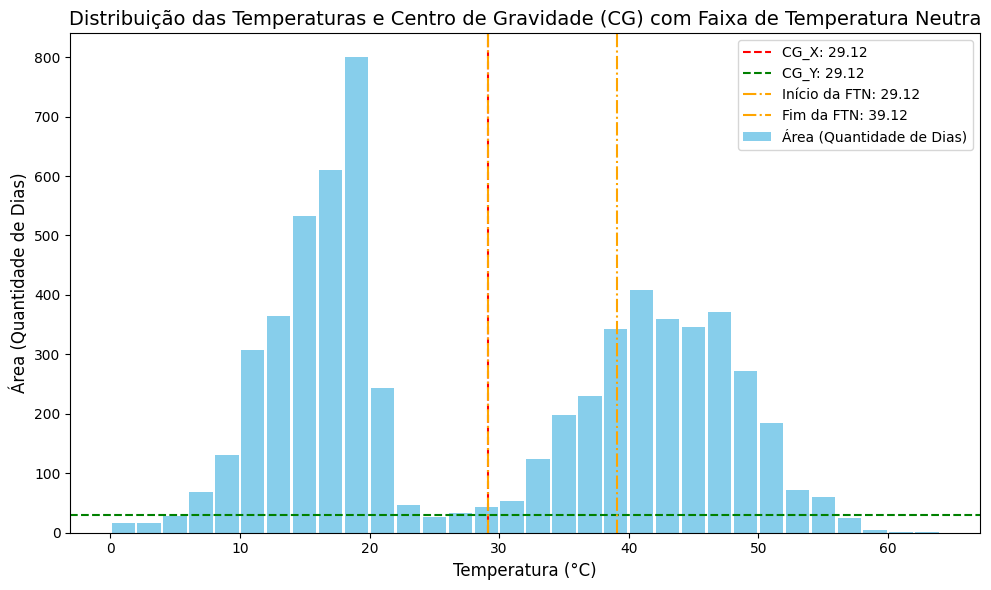

In [31]:
plt.figure(figsize=(10, 6))

plt.bar(df_bin_count_final['X'], df_bin_count_final['Area'], width=1.8, color='skyblue', label='Área (Quantidade de Dias)')

# Plotando o centro de gravidade CG_X e CG_Y no gráfico
plt.axvline(CG_X, color='red', linestyle='--', label=f'CG_X: {CG_X:.2f}')
plt.axhline(CG_Y, color='green', linestyle='--', label=f'CG_Y: {CG_Y:.2f}')

# Plotando a faixa de temperatura neutra
plt.axvline(CG_range[0], color='orange', linestyle='-.', label=f'Início da FTN: {CG_range[0]:.2f}')
plt.axvline(CG_range[1], color='orange', linestyle='-.', label=f'Fim da FTN: {CG_range[1]:.2f}')

plt.title('Distribuição das Temperaturas e Centro de Gravidade (CG) com Faixa de Temperatura Neutra', fontsize=14)
plt.xlabel('Temperatura (°C)', fontsize=12)
plt.ylabel('Área (Quantidade de Dias)', fontsize=12)

plt.legend()

plt.tight_layout()
plt.show()